In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from collections import Counter
import warnings

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
import seaborn as sns
import tensorflow as tf

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate,GRU,Dropout,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.io import FixedLenFeature
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, normalize

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving training.csv to training (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['training.csv']))
print(df)

        EventId  DER_mass_MMC  ...    Weight  Label
0        100000       138.470  ...  0.002653      s
1        100001       160.937  ...  2.233584      b
2        100002      -999.000  ...  2.347389      b
3        100003       143.905  ...  5.446378      b
4        100004       175.864  ...  6.245333      b
...         ...           ...  ...       ...    ...
249995   349995      -999.000  ...  4.505083      b
249996   349996      -999.000  ...  2.497259      b
249997   349997       105.457  ...  0.018636      s
249998   349998        94.951  ...  1.681611      b
249999   349999      -999.000  ...  1.877474      b

[250000 rows x 33 columns]


In [ ]:
df.head()

EventId  DER_mass_MMC  ...    Weight  Label
0   100000       138.470  ...  0.002653      s
1   100001       160.937  ...  2.233584      b
2   100002      -999.000  ...  2.347389      b
3   100003       143.905  ...  5.446378      b
4   100004       175.864  ...  6.245333      b

[5 rows x 33 columns]

In [ ]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
df.describe().T

count  ...            max
EventId                      250000.0  ...  349999.000000
DER_mass_MMC                 250000.0  ...    1192.026000
DER_mass_transverse_met_lep  250000.0  ...     690.075000
DER_mass_vis                 250000.0  ...    1349.351000
DER_pt_h                     250000.0  ...    2834.999000
DER_deltaeta_jet_jet         250000.0  ...       8.503000
DER_mass_jet_jet             250000.0  ...    4974.979000
DER_prodeta_jet_jet          250000.0  ...      16.690000
DER_deltar_tau_lep           250000.0  ...       5.684000
DER_pt_tot                   250000.0  ...    2834.999000
DER_sum_pt                   250000.0  ...    1852.462000
DER_pt_ratio_lep_tau         250000.0  ...      19.773000
DER_met_phi_centrality       250000.0  ...       1.414000
DER_lep_eta_centrality       250000.0  ...       1.000000
PRI_tau_pt                   250000.0  ...     764.408000
PRI_tau_eta                  250000.0  ...       2.497000
PRI_tau_phi                  250000.0  ...       3.142000
PRI_lep_pt                   250000.0  ...     560.271000
PRI_lep_eta                  250000.0  ...       2.503000
PRI_lep_phi                  250000.0  ...       3.142000
PRI_met                      250000.0  ...    2842.617000
PRI_met_phi                  250000.0  ...       3.142000
PRI_met_sumet                250000.0  ...    2003.976000
PRI_jet_num                  250000.0  ...       3.000000
PRI_jet_leading_pt           250000.0  ...    1120.573000
PRI_jet_leading_eta          250000.0  ...       4.499000
PRI_jet_leading_phi          250000.0  ...       3.141000
PRI_jet_subleading_pt        250000.0  ...     721.456000
PRI_jet_subleading_eta       250000.0  ...       4.500000
PRI_jet_subleading_phi       250000.0  ...       3.142000
PRI_jet_all_pt               250000.0  ...    1633.433000
Weight                       250000.0  ...       7.822543

[32 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:

df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

b    164333
s     85667
Name: Label, dtype: int64


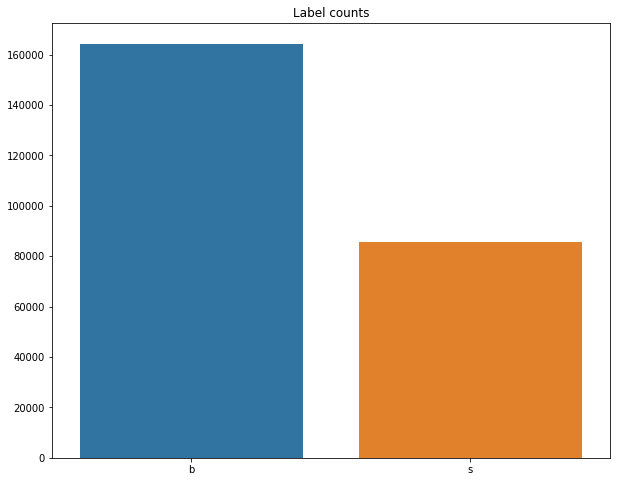

In [ ]:
fig,axes=plt.subplots(figsize=(10,8))
print(df['Label'].value_counts())
sns.barplot(x = df['Label'].value_counts().index, y = df['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

In [ ]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [ ]:
# Encoding the target, which is categorical in nature
le = preprocessing.LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df.head()

EventId  DER_mass_MMC  ...    Weight  Label
0   100000       138.470  ...  0.002653      1
1   100001       160.937  ...  2.233584      0
2   100002      -999.000  ...  2.347389      0
3   100003       143.905  ...  5.446378      0
4   100004       175.864  ...  6.245333      0

[5 rows x 33 columns]

In [ ]:
df[:100]

EventId  DER_mass_MMC  ...    Weight  Label
0    100000       138.470  ...  0.002653      1
1    100001       160.937  ...  2.233584      0
2    100002      -999.000  ...  2.347389      0
3    100003       143.905  ...  5.446378      0
4    100004       175.864  ...  6.245333      0
..      ...           ...  ...       ...    ...
95   100095        98.181  ...  5.823711      0
96   100096       113.750  ...  0.018636      1
97   100097       124.575  ...  0.018636      1
98   100098        77.578  ...  0.309795      0
99   100099       107.350  ...  2.317558      0

[100 rows x 33 columns]

**Correlation Matrix**

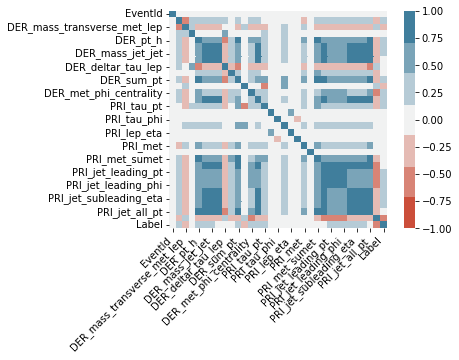

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(17, 230, n=7),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
import plotly as pt
import plotly.graph_objs as go

# these two lines are what allow your code to show up in a notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

corr = df.corr()

trace = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)
data=[trace]
fig = go.Figure(data = data)
iplot(fig)

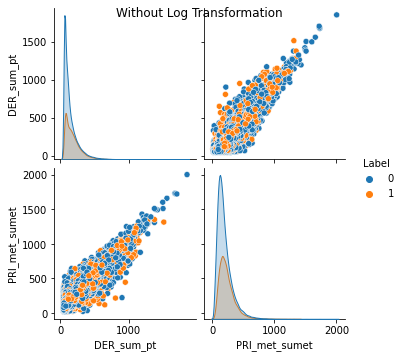

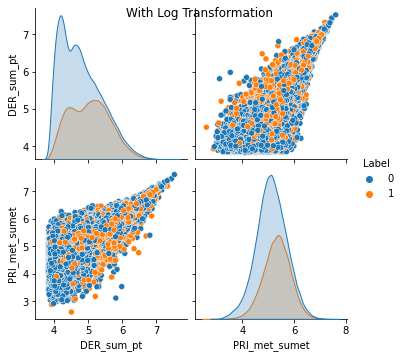

In [ ]:
higgs_select=df[["DER_sum_pt","PRI_met_sumet","Label"]]
sns.pairplot(higgs_select, hue="Label").fig.suptitle('Without Log Transformation')
plt.show()

x = higgs_select["DER_sum_pt"].apply(np.log)
y = higgs_select["PRI_met_sumet"].apply(np.log)
z= higgs_select["Label"]

d = {'DER_sum_pt': x, 'PRI_met_sumet': y,'Label':z}
higgs_new = pd.DataFrame(d)
sns.pairplot(higgs_new, hue="Label").fig.suptitle('With Log Transformation')
plt.show()

**BOX PLOT**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



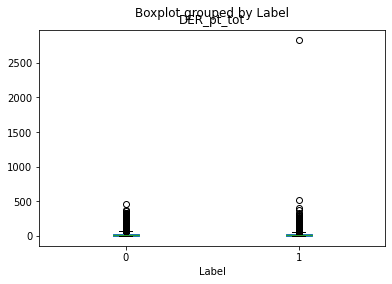

In [ ]:
df.boxplot(by ='Label', column =["DER_pt_tot"], grid = False)

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

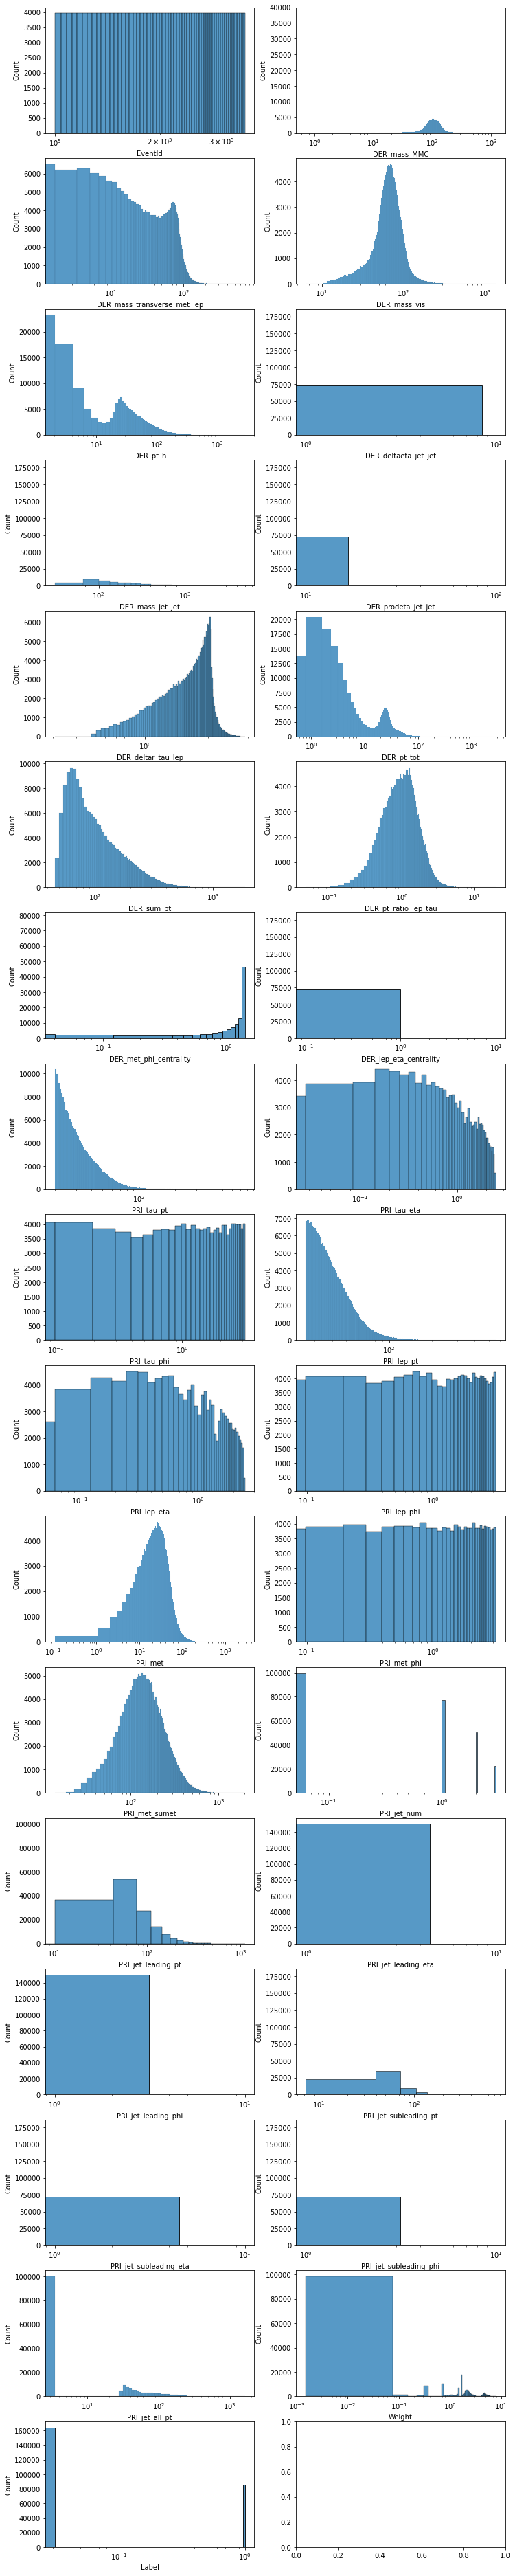

In [ ]:
import math
ncols = 2
nrows = math.ceil(len(df.columns)/ncols)
fig, axen = plt.subplots(nrows, ncols, figsize = (12, nrows*4))
for v, ax in zip(df.columns, axen.ravel()):
    sns.histplot(df[v], ax=ax)
    ax.set_xscale('log')

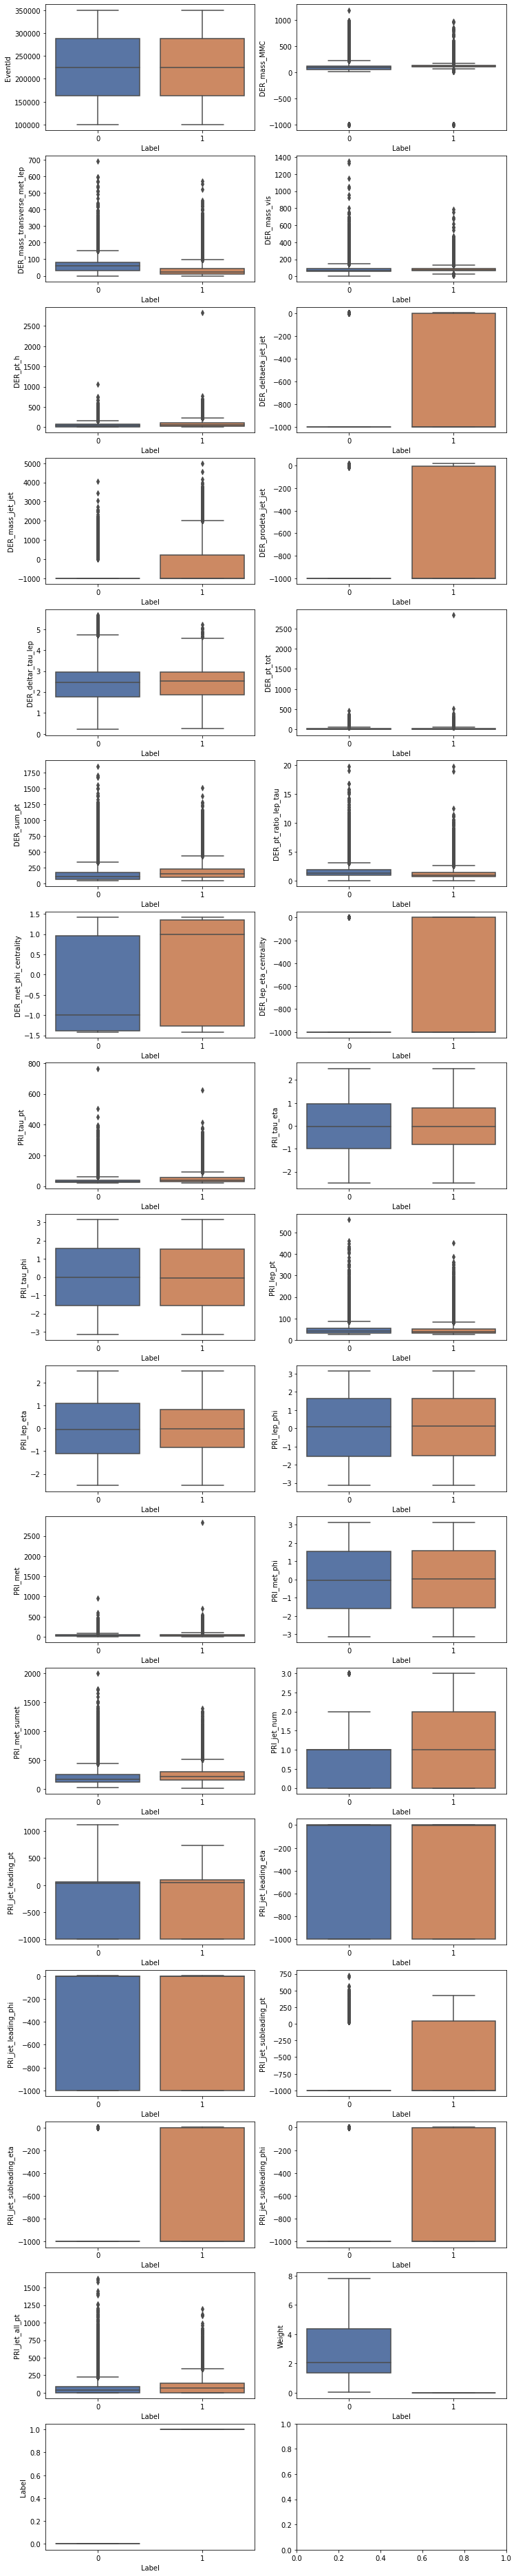

In [ ]:

fig, axen = plt.subplots(nrows, ncols, figsize = (12, nrows*4))
for v, ax in zip(df.columns, axen.ravel()):
    sns.set(style='whitegrid')
    sns.boxplot(x="Label",
                y=df[v],
                data=df,ax=ax)

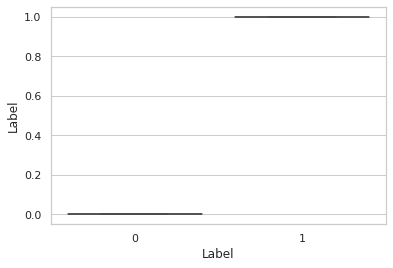

In [ ]:
sns.set(style='whitegrid')
 
sns.boxplot(x="Label",
                y=df[v],
                data=df)

In [ ]:
dr = remove_outlier(df, "DER_deltar_tau_lep")

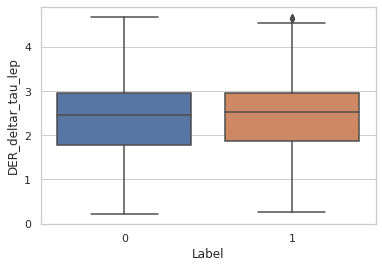

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x="Label",
                y="DER_deltar_tau_lep",
                data=dr)

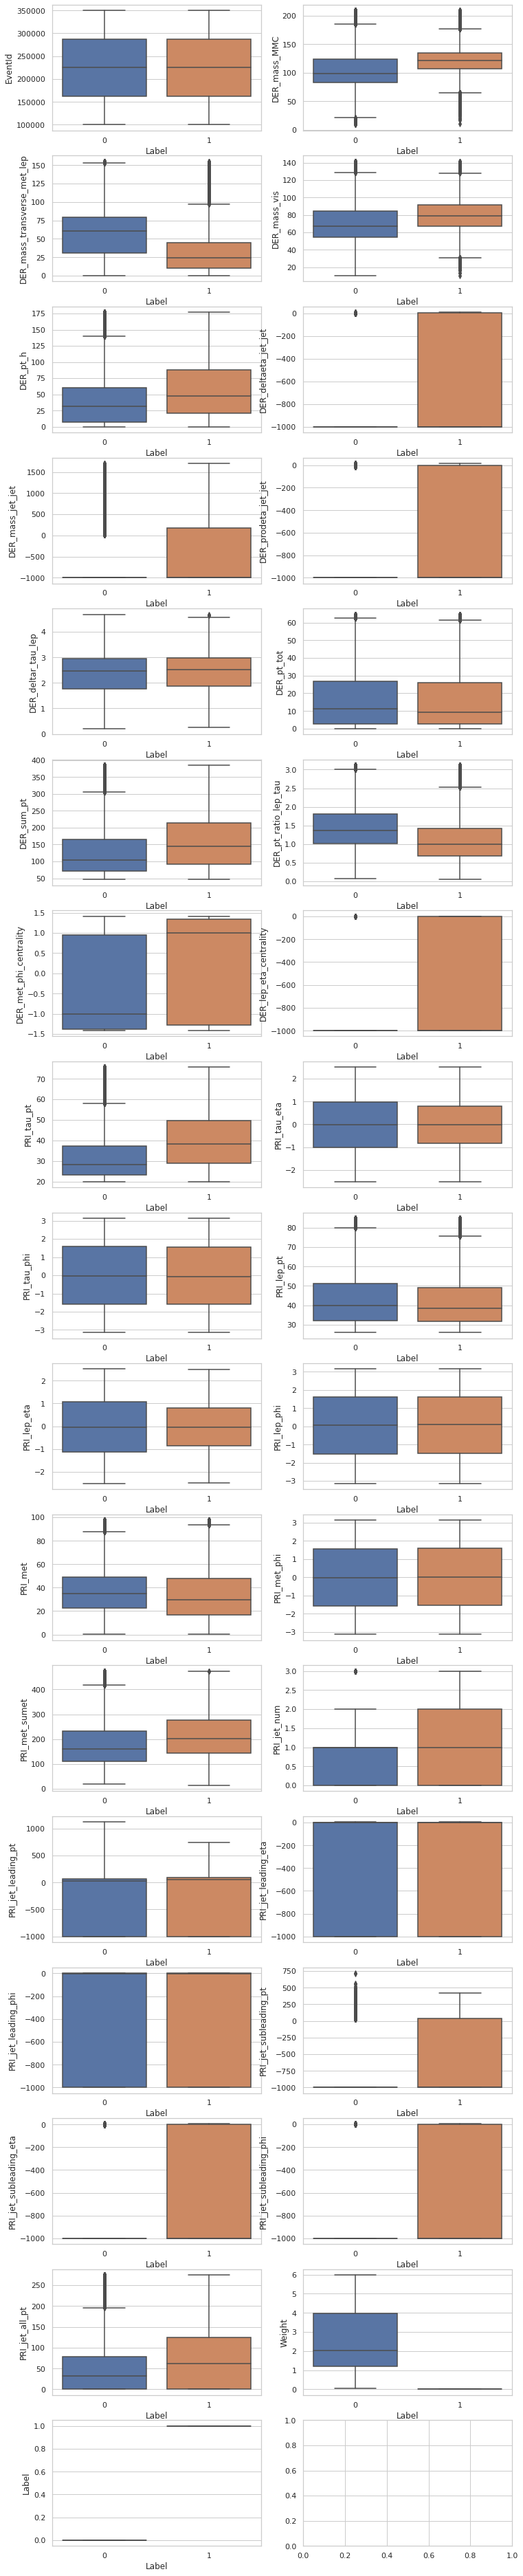

In [ ]:
fig, axen = plt.subplots(nrows, ncols, figsize = (12, nrows*4))
for v, ax in zip(df.columns, axen.ravel()):
    dr = remove_outlier(df, v)
    sns.set(style='whitegrid')
    sns.boxplot(x="Label",
                y=dr[v],
                data=dr,ax=ax)

**Data preprocessing**

In [ ]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [ ]:
df.drop(['PRI_jet_subleading_pt', 'PRI_jet_subleading_eta','PRI_jet_subleading_phi','DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet'], axis = 1, inplace = True)

In [ ]:
df[df==-999.000] = np.NaN

In [ ]:
df.fillna(df.mean(), inplace = True)
df

EventId  DER_mass_MMC  ...    Weight  Label
0        100000    138.470000  ...  0.002653      1
1        100001    160.937000  ...  2.233584      0
2        100002    121.858528  ...  2.347389      0
3        100003    143.905000  ...  5.446378      0
4        100004    175.864000  ...  6.245333      0
...         ...           ...  ...       ...    ...
249995   349995    121.858528  ...  4.505083      0
249996   349996    121.858528  ...  2.497259      0
249997   349997    105.457000  ...  0.018636      1
249998   349998     94.951000  ...  1.681611      0
249999   349999    121.858528  ...  1.877474      0

[250000 rows x 27 columns]

In [ ]:

df.drop(['PRI_met_sumet','PRI_jet_all_pt','EventId'],axis = 1, inplace = True)

In [ ]:
y_train = df['Label'].values
x_train = df.drop(['Label'], axis=1)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
import plotly as pt
import plotly.graph_objs as go

# these two lines are what allow your code to show up in a notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

corr = x_train.corr()

trace = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)
data=[trace]
fig = go.Figure(data = data)
iplot(fig)

In [ ]:
x_train = normalize(x_train)

In [ ]:
splitter=StratifiedShuffleSplit(n_splits=1,random_state=12)

for train,test in splitter.split(x_train,y_train):     #this will splits the index
    X_train_SS = x_train[train]
    y_train_SS = y_train[train]
    X_test_SS = x_train[test]
    y_test_SS = y_train[test]

In [ ]:
X_train_SS = np.reshape(X_train_SS, (X_train_SS.shape[0],X_train_SS.shape[1],1))
X_test_SS = np.reshape(X_test_SS, (X_test_SS.shape[0],X_test_SS.shape[1],1))